# Project 1
The main goal of this project is to do some basic image processing on some png images. 

## Setup

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install matplotlib


You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


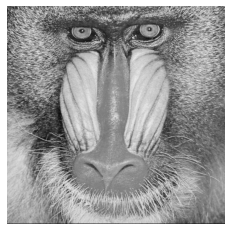

In [2]:
# Test setup, should show the baboon.png image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# open image file and stores it in a numpy array
img = io.imread('png_images/baboon.png')

plt.axis('off')
imgplot = plt.imshow(img, cmap='gray')

## Change the resolution of a image
Given a image with a certain resolution X and size Y, halve the resolution while mantaing the image's size.

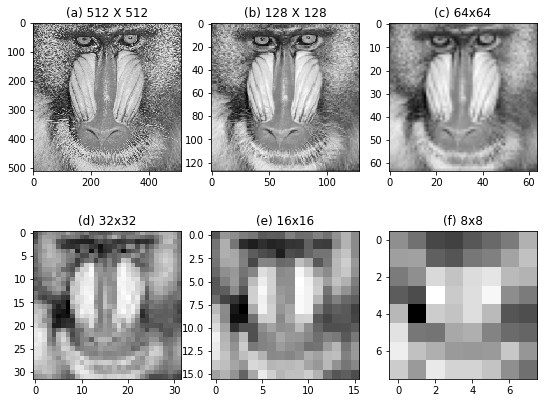

In [66]:
img = io.imread('png_images/baboon.png')


from skimage.transform import rescale, resize, downscale_local_mean


def halve_resolution(image):
    return downscale_local_mean(image, (2,2)).astype('uint8')

image256x256 = halve_resolution(img)
image128x128 = halve_resolution(image256x256)
image64x64 = halve_resolution(image128x128)
image32x32 = halve_resolution(image64x64)
image16x16 = halve_resolution(image32x32)
image8x8 = halve_resolution(image16x16)

fig1 = plt.figure(figsize=[7,7])

ax1 = fig1.add_subplot(2,3,1) 
ax1.imshow(img, interpolation='none', cmap='gray')
ax1.set_title('(a) 512 X 512')

ax2 = fig1.add_subplot(2,3,2)
ax2.imshow(image128x128, interpolation='none', cmap='gray')
ax2.set_title('(b) 128 X 128')

ax3 = fig1.add_subplot(2,3,3)
ax3.imshow(image64x64, cmap='gray')
ax3.set_title('(c) 64x64')

ax4 = fig1.add_subplot(2,3,4)
ax4.imshow(image32x32, cmap='gray')
ax4.set_title('(d) 32x32')

ax5 = fig1.add_subplot(2,3,5)
ax5.imshow(image16x16, cmap='gray')
ax5.set_title('(e) 16x16')

ax6 = fig1.add_subplot(2,3,6)
ax6.imshow(image8x8, cmap='gray')
ax6.set_title('(f) 8x8')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=-0.3)

fig1.savefig('results/resolution.png')


## Image Quantization
Create a function that can reduce the amount of shades of grey of a image to the number desired.

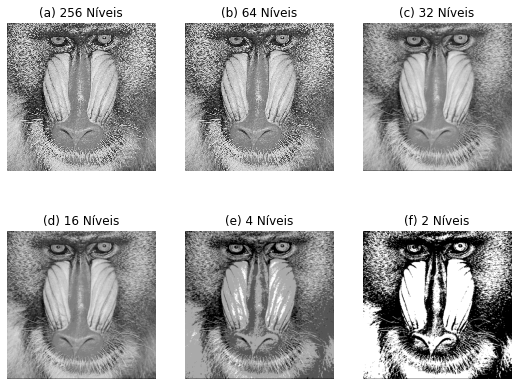

In [82]:
img = io.imread('png_images/baboon.png')

from math import log
def reduce_shades(image, n_shades):
    power_of_two = int(log(n_shades, 2))
    return image>>(8-power_of_two)

image64 = reduce_shades(img, 64)
image32 = reduce_shades(img, 32)
image16 = reduce_shades(img, 16)
image4 = reduce_shades(img, 4)
image2 = reduce_shades(img, 2)

fig2 = plt.figure(figsize=[7,7])

ax1 = fig2.add_subplot(2,3,1) 
ax1.imshow(img, interpolation='none', cmap='gray')
ax1.set_title('(a) 256 Níveis')
plt.axis('off')


ax2 = fig2.add_subplot(2,3,2)
ax2.imshow(image64, interpolation='none', cmap='gray')
ax2.set_title('(b) 64 Níveis')
plt.axis('off')

ax3 = fig2.add_subplot(2,3,3)
ax3.imshow(image32, cmap='gray')
ax3.set_title('(c) 32 Níveis')
plt.axis('off')

ax4 = fig2.add_subplot(2,3,4)
ax4.imshow(image16, cmap='gray')
ax4.set_title('(d) 16 Níveis')
plt.axis('off')


ax5 = fig2.add_subplot(2,3,5)
ax5.imshow(image4, cmap='gray')
ax5.set_title('(e) 4 Níveis')
plt.axis('off')


ax6 = fig2.add_subplot(2,3,6)
ax6.imshow(image2, cmap='gray')
ax6.set_title('(f) 2 Níveis')
plt.axis('off')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=-0.3)
fig2.savefig('results/quant.png')


## Grayscale
Given a image, for every pixel value in the image f[x,y] , transform it into a g(x,y) in these ways:    

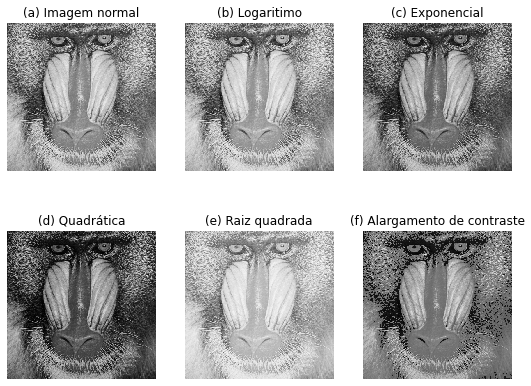

In [105]:
img = io.imread('png_images/baboon.png')


from math import exp
default_c = 255

def float_to_int8(float_matrix):
    rounded_matrix = np.round(float_matrix)
    return rounded_matrix.astype('uint8')


def normalize(image):
    return image/255

def denormalize(image, c):
    min_pixel = image.min()
    max_pixel = image.max()
    return float_to_int8(c*(image-min_pixel)/(max_pixel-min_pixel))

def transform_log(image, c = default_c):
    normalized_image = normalize(image)
    return denormalize(np.log(normalized_image+1), c)

def transform_exp(image, c = default_c):
    normalized_image = normalize(image)
    exp_image = np.exp(normalized_image)
    return denormalize(exp_image, c)

def transform_quadratic(image, c = default_c):
    normalized_image = normalize(image)
    return denormalize(np.power(normalized_image, 2), c)

def transform_sqrt(image, c = default_c):
    normalized_image = normalize(image)
    return denormalize(np.sqrt(normalized_image), c)

def transform_contrast(image, a, b, alpha, beta, gamma):
#   TODO: Change this to a where
    def transform_pixel(f):
        if f < a:
            return a*f
        elif a<= f and f < b:
            return beta*(f-a) + alpha*a
        else:
            return gamma*(f-b) + beta*(f-a) + alpha*a
    
    def map_transformed_to_normal(transformed_img):
        t_max_pixel = transformed_img.max()
        t_min_pixel = transformed_img.min()        
        return (transformed_img - t_min_pixel)*(255/t_max_pixel)
        
    transform_pixel_vec = np.vectorize(transform_pixel)
    t_image = transform_pixel_vec(image)
    return map_transformed_to_normal(t_image)
    
    
img_log = transform_log(img)
img_exp = transform_exp(img)
img_quad = transform_quadratic(img)
img_sqrt = transform_sqrt(img)
img_contrast = transform_contrast(img, 80, 160, 255, 127, 255)

fig3 = plt.figure(figsize=[7,7])

ax1 = fig3.add_subplot(2,3,1) 
ax1.imshow(img, interpolation='none', cmap='gray')
ax1.set_title('(a) Imagem normal')
plt.axis('off')


ax2 = fig3.add_subplot(2,3,2)
ax2.imshow(img_log, interpolation='none', cmap='gray')
ax2.set_title('(b) Logaritimo')
plt.axis('off')


ax3 = fig3.add_subplot(2,3,3)
ax3.imshow(img_exp, interpolation='none', cmap='gray')
ax3.set_title('(c) Exponencial')
plt.axis('off')


ax4 = fig3.add_subplot(2,3,4)
ax4.imshow(img_quad, interpolation='none', cmap='gray')
ax4.set_title('(d) Quadrática')
plt.axis('off')


ax5 = fig3.add_subplot(2,3,5)
ax5.imshow(img_sqrt, interpolation='none', cmap='gray')
ax5.set_title('(e) Raiz quadrada')
plt.axis('off')


ax6 = fig3.add_subplot(2,3,6)
ax6.imshow(img_contrast, interpolation='none', cmap='gray')
ax6.set_title('(f) Alargamento de contraste')
plt.axis('off')


plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=-0.3)
fig3.savefig('results/grayscale.png')


### Playing around with the parameters

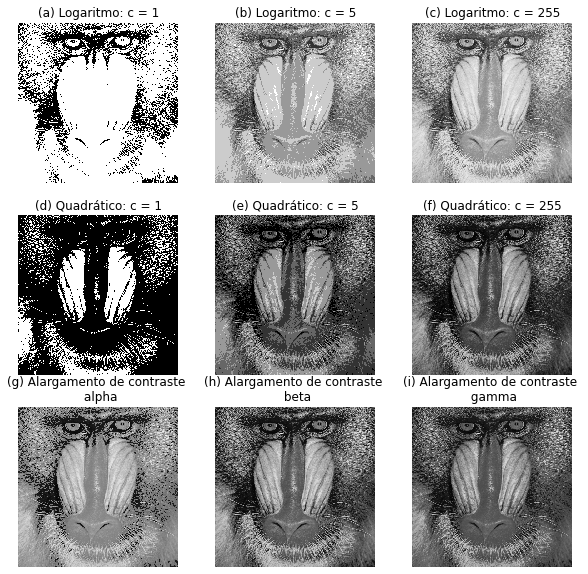

In [104]:
fig4 = plt.figure(figsize=[10,10])

img_log = transform_log(img, c = 1)
img_log_mid_c = transform_log(img, c = 5)
img_log_high_c = transform_log(img, c = 255)

img_quad = transform_quadratic(img, c= 1)
img_quad_mid_c = transform_quadratic(img, c= 5)
print()
img_quad_high_c = transform_quadratic(img, c = 255)

img_contrast   = transform_contrast(img, 80, 160, 255, 127, 127)
img_contrast_2 = transform_contrast(img, 80, 160, 127, 255, 127)
img_contrast_3 = transform_contrast(img, 80, 160, 127, 127, 255)


ax1 = fig4.add_subplot(3,3,1) 
ax1.imshow(img_log, interpolation='none', cmap='gray')
ax1.set_title('(a) Logaritmo: c = 1')
plt.axis('off')


ax12 = fig4.add_subplot(3,3,2) 
ax12.imshow(img_log_mid_c, interpolation='none', cmap='gray')
ax12.set_title('(b) Logaritmo: c = 5')
plt.axis('off')


ax2 = fig4.add_subplot(3,3,3)
ax2.imshow(img_log_high_c, interpolation='none', cmap='gray')
ax2.set_title('(c) Logaritmo: c = 255')
plt.axis('off')


ax3 = fig4.add_subplot(3,3,4)
ax3.imshow(img_quad, interpolation='none', cmap='gray')
ax3.set_title('(d) Quadrático: c = 1')
plt.axis('off')

ax13 = fig4.add_subplot(3,3,5)
ax13.imshow(img_quad_mid_c, interpolation='none', cmap='gray')
ax13.set_title('(e) Quadrático: c = 5')
plt.axis('off')

ax4 = fig4.add_subplot(3,3,6)
ax4.imshow(img_quad_high_c, interpolation='none', cmap='gray')
ax4.set_title('(f) Quadrático: c = 255')
plt.axis('off')

ax5 = fig4.add_subplot(3,3,7)
ax5.imshow(img_contrast, interpolation='none', cmap='gray')
ax5.set_title('(g) Alargamento de contraste \n alpha')
plt.axis('off')

ax14 = fig4.add_subplot(3,3,8)
ax14.imshow(img_contrast_2, interpolation='none', cmap='gray')
ax14.set_title('(h) Alargamento de contraste \n beta')
plt.axis('off')

ax6 = fig4.add_subplot(3,3,9)
ax6.imshow(img_contrast_3, interpolation='none', cmap='gray')
ax6.set_title('(i) Alargamento de contraste \n gamma')
plt.axis('off')

fig4.savefig('c_diff.png')


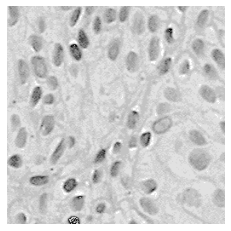

In [18]:
img_cells = io.imread('gif_images/cells.gif')
plt.axis('off')
imgplot = plt.imshow(transform_exp(img_cells, c=2000), cmap='gray')
